# 数据结构的设计
我们需要设计一种数据结构来存储给定的向量，并快速得到一个点限定距离内点的数目，从而得到密度
然后我们可以根据密度进行排序，得到比给定点密度更大的点的最近距离，这个量负责选出聚类中心

In [101]:
from sklearn.metrics import davies_bouldin_score
import numpy as np
from matplotlib import pyplot as plt
class DensityBasedCluster:
    def __init__(self, vectors, distance_threshold,C):
        self.C=C
        self.vectors = np.array(vectors)
        self.threshold = distance_threshold
        self.densities = self.calculate_densities()
        self.distances = self.find_density_and_distance()
        plt.plot(self.densities,self.distances,'.')
        plt.show()
        plt.close()
        self.center=self.select_center()
        self.labels=self.cluster()
        self.plot()
    def refresh(self):
        self.densities = self.calculate_densities()
        self.distances = self.find_density_and_distance()
        
        self.center=self.select_center()
        self.labels=self.cluster()
        plt.plot(self.densities,self.distances,'.')
        plt.show()
        plt.close()
        self.plot()
    def calculate_densities(self):
        densities = []
        for point in self.vectors:
            count = sum(np.linalg.norm(point - other_point) <= self.threshold 
                        for other_point in self.vectors)
            densities.append(count)
        return np.array(densities)

    def find_density_and_distance(self):
        sorted_indices = np.argsort(-self.densities)
        results = [None] * len(self.vectors)
        distances = [None] * len(self.vectors)  
        # 对于密度最大的点，找到最远的点
        max_density_index = sorted_indices[0]
        farthest_distance = max(np.linalg.norm(self.vectors[max_density_index] - point) for point in self.vectors)
        results[max_density_index] = (self.densities[max_density_index], farthest_distance)
        distances[max_density_index] = farthest_distance


        for i, index in enumerate(sorted_indices[1:], 1):
            min_distance = float('inf')
            nearest_index = None

            for higher_density_index in sorted_indices[:i]:
                distance = np.linalg.norm(self.vectors[index] - self.vectors[higher_density_index])
                if distance < min_distance:
                    min_distance = distance
                    nearest_index = higher_density_index

            results[index] = (self.densities[index], min_distance) if nearest_index is not None else (self.densities[index], None)
            distances[index] = min_distance if nearest_index is not None else None
        return distances
    
        pass
    def cluster(self):
        labels=np.zeros(len(self.vectors))
        # 先为中心点标记
        flag=1
        for i in self.center:
            labels[i]=flag
            flag+=1
        # 为每个点标记
        for i in range(len(self.vectors)):
            if labels[i]==0:
                # 找到最近的中心点
                min_distance=float('inf')
                nearest_center=None
                for center in self.center:
                    distance=np.linalg.norm(self.vectors[i]-self.vectors[center])
                    if distance<min_distance:
                        min_distance=distance
                        nearest_center=center
                #print(nearest_center)    
                labels[i]=labels[nearest_center]
        return labels
    def is_center(self,distance,density):
        if distance>self.C:
            return True
        else:
            return False
    def select_center(self):
        center=[]
        for i in range(len(self.vectors)):
            #print(self.distances[i],self.densities[i])
            if self.is_center(self.distances[i],self.densities[i]):
                center.append(i)
        return center
    def plot(self):
        # 为不同的类别设置不同的颜色,检查每一个类别，为新的类别设置新的颜色rgb

        colors={}
        for i in self.labels:
            if i not in colors:
                colors[i]=np.random.rand(3,)
        for i in colors.keys():
            plt.scatter(self.vectors[self.labels==i,0],self.vectors[self.labels==i,1],color=colors[i])
            
# Example usage
#vectors = [[1, 2], [2, 3], [3, 4], [5, 5]]
#cluster = DensityBasedCluster(vectors, 1.5)


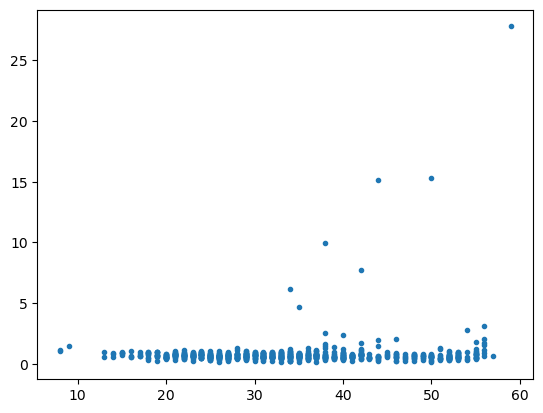

0.572229572344525


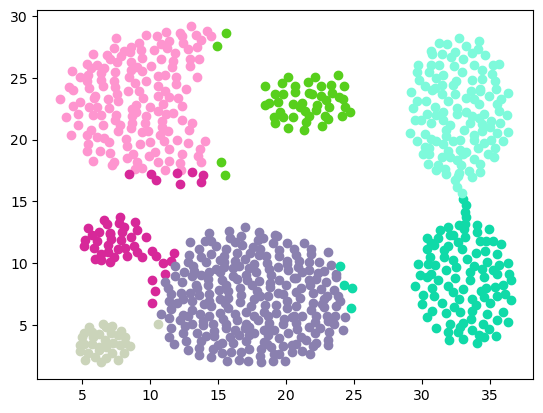

In [102]:
with open('./Datasets/Aggregation.txt', 'r') as f:
    lines = f.readlines()
    vectors = []
    for line in lines:
        vector = [float(x) for x in line.strip().split(' ')]
        vectors.append(vector)
cluster = DensityBasedCluster(vectors, 2.8075,4)
#results = cluster.find_density_and_distance()
print(davies_bouldin_score(vectors, cluster.labels))

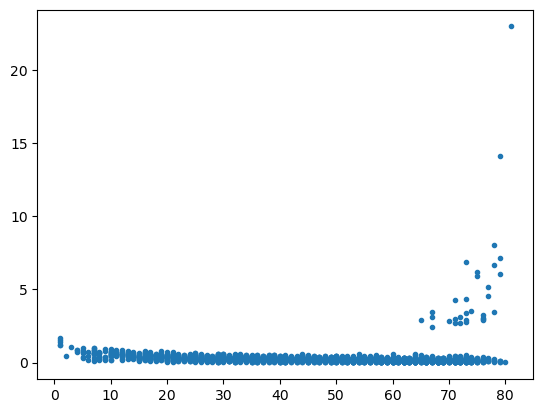

0.5470575289832145


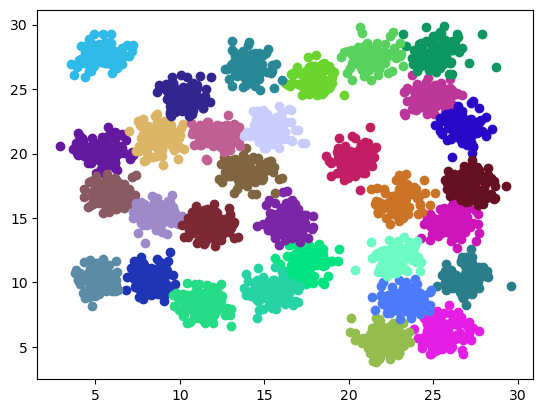

In [105]:
with open('./Datasets/D31.txt', 'r') as f:
    lines = f.readlines()
    vectors = []
    for line in lines:
        vector = [float(x) for x in line.strip().split(' ')]
        vectors.append(vector)
cluster = DensityBasedCluster(vectors, 1.2,2)
#results = cluster.find_density_and_distance()
print(davies_bouldin_score(vectors, cluster.labels))

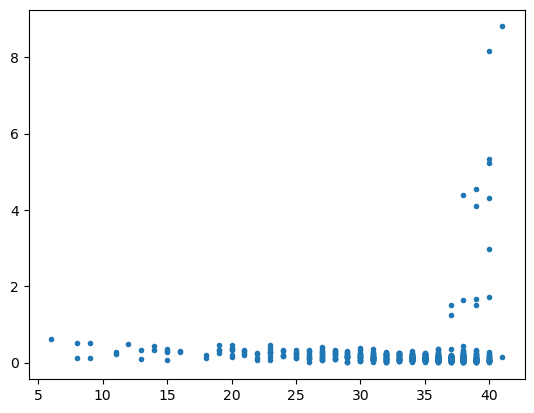

0.31611506739556305


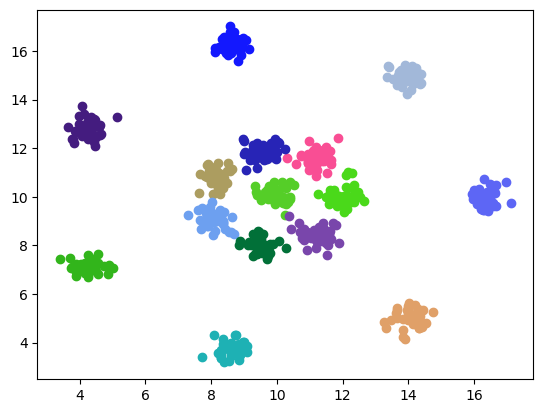

In [108]:
with open('./Datasets/R15.txt', 'r') as f:
    lines = f.readlines()
    vectors = []
    for line in lines:
        vector = [float(x) for x in line.strip().split(' ')]
        vectors.append(vector)
cluster = DensityBasedCluster(vectors, 0.8,1)
#results = cluster.find_density_and_distance()
print(davies_bouldin_score(vectors, cluster.labels))